## <center>第七組-空氣預測</center>

In [1]:
# -*- coding: UTF-8 -*-
%autosave 120
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, tensorflow, scipy

Autosaving every 120 seconds


Software versions
Python 3.7.0 64bit [MSC v.1912 64 bit (AMD64)]
IPython 6.5.0
OS Windows 10 10.0.17134 SP0
pandas 0.23.4
numpy 1.15.1
matplotlib 2.2.3
seaborn 0.9.0
tensorflow The 'tensorflow' distribution was not found and is required by the application
scipy 1.1.0
Sun Jan 06 22:39:53 2019 ¢Dx¢D_?D¡PCRE?!

In [2]:
# 定義函數以便執行肩並肩的列印
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

In [3]:
# 釋放記憶體空間 - Free Memory
# (1) 獲取物件及其大小的排序列表 
# (2) 將刪除的物件所佔的記憶體釋放
def memoryClean(dirList):
    print('Total Process Memory Usages: %s' %psutil.Process().memory_info().rss)
    print('Memory Usage Statistics: %s' %str(psutil.virtual_memory()))
    reserved_vars = ['In', 'Out', 'exit', 'quit', 'ipython_vars', 
                     'side_by_side', 'memoryClean']
    # Display Memory Usage
    # sorted([(x, sys.getsizeof(globals().get(x))) for x in dir()
            # if not x.startswith('_') and
            # x not in sys.modules and
            # x not in ipython_vars],key=lambda x: x[1], reverse=True)
    for name in dirList:
        if not name.startswith('_') and name not in sys.modules and name not in reserved_vars:
            del globals()[name]
    import gc
    gc.collect()

In [4]:
# 建立目錄
IODataDir = "./Data_and_Images"
import os
if not os.path.exists(IODataDir):
    os.makedirs(IODataDir)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import matplotlib.mlab as mlab
import matplotlib.ticker as ticker
import json
%matplotlib inline

## 目錄

* [1.為什麼要做這個題目?](#1.為什麼要做這個題目?)
* [2.資料欄位說明](#2.資料欄位說明)
* [3.預測](#3.預測)
  * [3.1去除風向的變因](#3.1去除風向的變因)
  * [3.2去除相對溼度的變因](#3.2去除相對溼度的變因)
  * [3.3去除溫度的變因](#3.3去除溫度的變因)
  * [3.4只有風速&溫度預測值](#3.4只有風速&溫度預測值)
  * [3.5模型預測的最小平方法](#3.5模型預測的最小平方法)

## 1.為什麼要做這個題目

## 現在生活中空氣變化多，也因為一些因素使空氣變得更加複雜，許多人都會因為不知道隔天的空氣是何其差而疏忽了預防，因此我們想利用長期空氣和天氣走向來預測隔天的空氣來解決這個問題。

[Back to Contents](#目錄)

## 2.資料欄位說明

## 縣市:高雄市
## 監測日期:2018/1/1~2018/12/6
## 監測資料:每個監測日分別的PM10、PM2.5、風速(WIND_SPEED)、溫度(AMB_TEMP)、相對濕度(RH)、風向(WB)

In [6]:
RFMsDF2 = pd.read_csv('./'+IODataDir+'/Air3.csv', encoding = 'utf-8')
RFMsDF3 = pd.read_csv('./'+IODataDir+'/WD_201811.csv', encoding = 'utf-8')
RFMsDF4 = pd.read_csv('./'+IODataDir+'/Air1207To28.csv', encoding = 'utf-8',)
RFMsDF5 = pd.read_csv('./'+IODataDir+'/WD_20181207To28.csv', encoding = 'utf-8',)

In [7]:
#資料整理
RFMsDF = RFMsDF2[['監測日期','PM 10','PM 2.5','WIND_SPEED','AMB_TEMP','RH']]
RFMsDF = RFMsDF[(RFMsDF['PM 10'] != '-')&(RFMsDF['PM 2.5'] != '-')&(RFMsDF['WIND_SPEED'] != '-')&(RFMsDF['AMB_TEMP'] != '-')&(RFMsDF['RH'] != '-')]
RFMsDF['PM 10'] = RFMsDF['PM 10'].astype(float)
RFMsDF['PM 2.5'] = RFMsDF['PM 2.5'].astype(float)
RFMsDF['WIND_SPEED'] = RFMsDF['WIND_SPEED'].astype(float)
RFMsDF['AMB_TEMP'] = RFMsDF['AMB_TEMP'].astype(float)
RFMsDF['RH'] = RFMsDF['RH'].astype(float)


In [8]:
RFMsDFCompare = RFMsDF4[['監測日期','PM 10','PM 2.5','WIND_SPEED','AMB_TEMP','RH']]
type(RFMsDFCompare['PM 10'][2])

numpy.float64

In [9]:
RFMsDFCompare = RFMsDF4[['監測日期','PM 10','PM 2.5','WIND_SPEED','AMB_TEMP','RH']]
RFMsDFCompare['PM 10'] = RFMsDFCompare['PM 10'].astype(str)
RFMsDFCompare['PM 2.5'] = RFMsDFCompare['PM 2.5'].astype(str)
RFMsDFCompare['WIND_SPEED'] = RFMsDFCompare['WIND_SPEED'].astype(str)
RFMsDFCompare['AMB_TEMP'] = RFMsDFCompare['AMB_TEMP'].astype(str)
RFMsDFCompare['RH'] = RFMsDFCompare['RH'].astype(str)
RFMsDFCompare = RFMsDFCompare[(RFMsDFCompare['PM 10'] != '-')&(RFMsDFCompare['PM 2.5'] != '-')&(RFMsDFCompare['WIND_SPEED'] != '-')&(RFMsDFCompare['AMB_TEMP'] != '-')&(RFMsDFCompare['RH'] != '-')]
RFMsDFCompare['PM 10'] = RFMsDFCompare['PM 10'].astype(float)
RFMsDFCompare['PM 2.5'] = RFMsDFCompare['PM 2.5'].astype(float)
RFMsDFCompare['WIND_SPEED'] = RFMsDFCompare['WIND_SPEED'].astype(float)
RFMsDFCompare['AMB_TEMP'] = RFMsDFCompare['AMB_TEMP'].astype(float)
RFMsDFCompare['RH'] = RFMsDFCompare['RH'].astype(float)
DFCompare_Mean = RFMsDFCompare.groupby(['監測日期']).mean()
DFCompare_Mean = DFCompare_Mean.reset_index()
DFCompare_Mean = pd.merge(DFCompare_Mean, RFMsDF5, on='監測日期')
DFCompare_Mean.info()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 7 columns):
監測日期          22 non-null object
PM 10         22 non-null float64
PM 2.5        22 non-null float64
WIND_SPEED    22 non-null float64
AMB_TEMP      22 non-null float64
RH            22 non-null float64
WD            22 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.4+ KB


In [10]:
DF_Mean = RFMsDF.groupby(['監測日期']).mean()
DF_Mean = DF_Mean.reset_index()
DF_Mean = pd.merge(DF_Mean, RFMsDF3, on='監測日期')
DF_Mean.head()
Factors=DF_Mean[['WIND_SPEED','AMB_TEMP','RH','WD']]
Factors=Factors.values
DependentVariable = DF_Mean[['PM 2.5']]
DependentVariable=DependentVariable.values

In [11]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linRegNoise = LinearRegression()
linReg.fit(Factors, DependentVariable)
side_by_side("No noise added data ==>","w0 = {0:.2f}".format(linReg.intercept_[0]),
             "w coefficient(s) = "+str(linReg.coef_[0]))

'No noise added data ==>'    'w0 = 121.67'    'w coefficient(s) = [-11.38923866  -2.05588345  -0.37847191   0.02007787]'



[Back to Contents](#目錄)

## 3.預測

## 預測說明:利用2018/1/1到2018/12/6的風速(WIND_SPEED)、溫度(AMB_TEMP)、相對濕度(RH)、風向(WB)的資料去做回歸來比較其相關性

In [12]:
import statsmodels.api as sm
X = sm.add_constant(Factors)
model = sm.OLS(DependentVariable, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     75.89
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           1.13e-45
Time:                        22:40:04   Log-Likelihood:                -1262.6
No. Observations:                 338   AIC:                             2535.
Df Residuals:                     333   BIC:                             2554.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.6710      7.450     16.331      0.000     107.015     136.327
x1           -11.3892      1.572     -7.246      0.000     -14.481      -8.297
x2            -2.0559      0.144    -14.299      0.000      -2.339      -1.773
x3            -0.3785      0.077     -4.931      0.000      -0.529      -0.227
x4             0.0201      0.005      3.974      0.000       0.010       0.030
==============================================================================
Omnibus:                       54.334   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.400
Skew:                           0.850   Prob(JB):                     1.06e-24
Kurtosis:                       5.224   Cond. No.                     3.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
Factors_Compare=DFCompare_Mean[['WIND_SPEED','AMB_TEMP','RH','WD']]
Factors_Compare=Factors_Compare.values
DependentVariable_Compare = DFCompare_Mean[['PM 2.5']]
DependentVariable_Compare=DependentVariable_Compare.values

In [14]:
X_Compare = sm.add_constant(Factors_Compare)
Y_predict = model.predict(X_Compare)
print(Y_predict)

[24.48243805 29.97787452 23.03924939 30.62882756 25.22173866 33.48876266
 28.04923165 34.15037616 36.76668188 24.31009287 35.15922527 42.2747606
 34.83055295 34.90255265 29.19526088 22.58935644 28.8584897  29.34848893
 29.36119625 15.66239094 23.72030671 28.40238535]


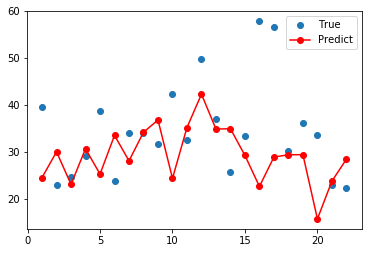

In [15]:
import matplotlib.pyplot as plt
X_new=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
fig, ax = plt.subplots()
ax.plot(X_new,DependentVariable_Compare,'o', label="True")
ax.plot(X_new,Y_predict,'ro-',label="Predict")
ax.legend(loc="best")

In [16]:
from sklearn.metrics import mean_squared_error
All_LQE = mean_squared_error(DependentVariable_Compare,Y_predict)

[Back to Contents](#目錄)

## 3.1去除風向的變因

In [17]:
#去除風向的變因
Factors_No_WD = DF_Mean[['WIND_SPEED','AMB_TEMP','RH']]
Factors_No_WD=Factors_No_WD.values
DependentVariable = DF_Mean[['PM 2.5']]
DependentVariable=DependentVariable.values
#回歸
X = sm.add_constant(Factors_No_WD)
model_No_WD = sm.OLS(DependentVariable, X).fit()
model_No_WD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     91.85
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.30e-43
Time:                        22:40:06   Log-Likelihood:                -1270.5
No. Observations:                 338   AIC:                             2549.
Df Residuals:                     334   BIC:                             2564.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        129.2256      7.362     17.554      0.000     114.745     143.706
x1           -10.4310      1.587     -6.572      0.000     -13.553      -7.309
x2            -2.0358      0.147    -13.864      0.000      -2.325      -1.747
x3            -0.4475      0.076     -5.857      0.000      -0.598      -0.297
==============================================================================
Omnibus:                       60.238   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.037
Skew:                           0.912   Prob(JB):                     5.79e-29
Kurtosis:                       5.431   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#去除風向預測值
Factors_No_WD_Compare=DFCompare_Mean[['WIND_SPEED','AMB_TEMP','RH']]
Factors_No_WD_Compare=Factors_No_WD_Compare.values
X_Compare = sm.add_constant(Factors_No_WD_Compare)
Y_No_WD_predict = model_No_WD.predict(X_Compare)
print(Y_No_WD_predict)

[22.11569586 27.96605528 27.81547754 28.39087292 22.88505606 31.37636538
 32.72737719 31.85600954 33.80444598 28.27102496 33.56222691 40.76257497
 38.15667232 39.74448692 33.50220078 26.87349778 26.04536019 27.17714136
 27.14599291 20.092098   22.15664425 33.36855819]


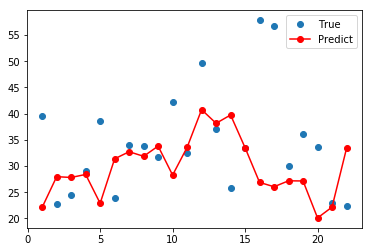

In [19]:
X_new=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
fig, ax = plt.subplots()
ax.plot(X_new,DependentVariable_Compare,'o', label="True")
ax.plot(X_new,Y_No_WD_predict,'ro-',label="Predict")
ax.legend(loc="best")

In [20]:
#去除風向 least Square error
No_WD_LQE = mean_squared_error(DependentVariable_Compare,Y_No_WD_predict)

[Back to Contents](#目錄)

## 3.2去除相對溼度的變因

In [21]:
#去除相對溼度的變因
Factors_No_RH = DF_Mean[['WIND_SPEED','AMB_TEMP','WD']]
Factors_No_RH=Factors_No_RH.values
DependentVariable = DF_Mean[['PM 2.5']]
DependentVariable=DependentVariable.values
#回歸
X = sm.add_constant(Factors_No_RH)
model_No_RH = sm.OLS(DependentVariable, X).fit()
model_No_RH.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     87.01
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           1.28e-41
Time:                        22:40:06   Log-Likelihood:                -1274.6
No. Observations:                 338   AIC:                             2557.
Df Residuals:                     334   BIC:                             2572.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.2138      5.346     17.809      0.000      84.697     105.730
x1           -11.3390      1.626     -6.975      0.000     -14.537      -8.141
x2            -2.1843      0.146    -14.935      0.000      -2.472      -1.897
x3             0.0257      0.005      5.052      0.000       0.016       0.036
==============================================================================
Omnibus:                       26.144   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.363
Skew:                           0.561   Prob(JB):                     1.27e-08
Kurtosis:                       4.151   Cond. No.                     2.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#去除相對溼度 預測值
Factors_No_RH_Compare=DFCompare_Mean[['WIND_SPEED','AMB_TEMP','WD']]
Factors_No_RH_Compare=Factors_No_RH_Compare.values
X_Compare = sm.add_constant(Factors_No_RH_Compare)
Y_No_RH_predict = model_No_RH.predict(X_Compare)
print(Y_No_RH_predict)

[26.4679702  30.21910886 21.41292526 31.78891536 27.23790819 33.75859048
 25.71131528 34.66897061 38.03523349 24.5688264  33.58090733 41.15076902
 32.85448341 28.1503217  24.79914177 22.38759308 31.36213371 30.43962981
 29.95057536 16.55941919 23.90055541 25.71796682]


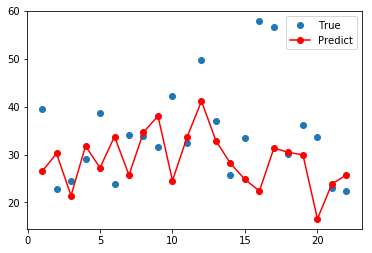

In [23]:
X_new=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
fig, ax = plt.subplots()
ax.plot(X_new,DependentVariable_Compare,'o', label="True")
ax.plot(X_new,Y_No_RH_predict,'ro-',label="Predict")
ax.legend(loc="best")

In [24]:
#去除相對溼度 least Square error
No_RH_LQE = mean_squared_error(DependentVariable_Compare,Y_No_RH_predict)

[Back to Contents](#目錄)

## 3.3去除溫度的變因

In [25]:
#去除溫度的變因
Factors_No_TEMP = DF_Mean[['WIND_SPEED','RH','WD']]
Factors_No_TEMP=Factors_No_TEMP.values
DependentVariable = DF_Mean[['PM 2.5']]
DependentVariable=DependentVariable.values
#回歸
X = sm.add_constant(Factors_No_TEMP)
model_No_TEMP = sm.OLS(DependentVariable, X).fit() #回歸的model
model_No_TEMP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     20.53
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           3.11e-12
Time:                        22:40:07   Log-Likelihood:                -1343.5
No. Observations:                 338   AIC:                             2695.
Df Residuals:                     334   BIC:                             2710.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.0119      8.539      8.902      0.000      59.215      92.808
x1            -7.1752      1.959     -3.664      0.000     -11.028      -3.323
x2            -0.5773      0.096     -6.029      0.000      -0.766      -0.389
x3             0.0175      0.006      2.739      0.006       0.005       0.030
==============================================================================
Omnibus:                       61.734   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.352
Skew:                           1.086   Prob(JB):                     4.40e-22
Kurtosis:                       4.504   Cond. No.                     3.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#去除溫度 預測值
Factors_No_TEMP_Compare=DFCompare_Mean[['WIND_SPEED','RH','WD']]
Factors_No_TEMP_Compare=Factors_No_TEMP_Compare.values
X_Compare = sm.add_constant(Factors_No_TEMP_Compare)
Y_No_TEMP_predict = model_No_TEMP.predict(X_Compare) #用回歸model做出來的預測
print(Y_No_TEMP_predict)

[22.13352662 24.93822831 19.07768613 24.99496085 21.94301381 25.83455588
 21.05564222 26.38907016 27.91844359 18.48720489 27.53393061 31.25953631
 25.39172065 31.04887415 25.89251982 18.43641427 24.00195151 23.69196262
 25.2446053  13.10565217 20.76501348 20.19621268]


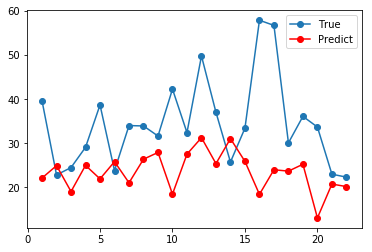

In [27]:
X_new=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
fig, ax = plt.subplots()
ax.plot(X_new,DependentVariable_Compare,'o-', label="True")
ax.plot(X_new,Y_No_TEMP_predict,'ro-',label="Predict")
ax.legend(loc="best")

[Back to Contents](#目錄)

## 3.4只有風速&溫度預測值

In [28]:
#去除溫度least Square error
No_TEMP_LQE = mean_squared_error(DependentVariable_Compare,Y_No_TEMP_predict)

In [29]:
#去除溫度的變因
Factors_Two = DF_Mean[['WIND_SPEED','AMB_TEMP']]
Factors_Two=Factors_Two.values
DependentVariable = DF_Mean[['PM 2.5']]
DependentVariable=DependentVariable.values
#回歸
X = sm.add_constant(Factors_Two)
model_Two = sm.OLS(DependentVariable, X).fit() #回歸的model
model_Two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     109.7
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.23e-37
Time:                        22:40:08   Log-Likelihood:                -1287.0
No. Observations:                 338   AIC:                             2580.
Df Residuals:                     335   BIC:                             2591.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.9002      5.487     18.026      0.000      88.108     109.693
x1           -10.0334      1.663     -6.034      0.000     -13.304      -6.763
x2            -2.1889      0.152    -14.447      0.000      -2.487      -1.891
==============================================================================
Omnibus:                       24.864   Durbin-Watson:                   0.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.228
Skew:                           0.531   Prob(JB):                     2.24e-08
Kurtosis:                       4.172   Cond. No.                         248.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#只有風速&溫度 預測值
Factors_Two_Compare=DFCompare_Mean[['WIND_SPEED','AMB_TEMP']]
Factors_Two_Compare=Factors_Two_Compare.values
X_Compare = sm.add_constant(Factors_Two_Compare)
Y_Two_predict = model_Two.predict(X_Compare) #用回歸model做出來的預測
print(Y_Two_predict)

[23.76215021 27.56313077 27.45919302 29.05381346 24.58019789 30.97389867
 31.45011038 31.6998868  34.34926352 29.97852539 31.03709805 38.8332204
 36.85749488 33.02401338 29.53049109 28.12021691 28.181313   27.77746212
 27.10575454 22.75887587 21.83444482 31.76025104]


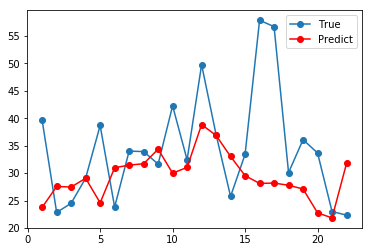

In [31]:
X_new=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
fig, ax = plt.subplots()
ax.plot(X_new,DependentVariable_Compare,'o-', label="True")
ax.plot(X_new,Y_Two_predict,'ro-',label="Predict")
ax.legend(loc="best")

[Back to Contents](#目錄)

## 3.5模型預測的最小平方法

In [32]:
#只有溫度&風速 least Square error
Two_LQE = mean_squared_error(DependentVariable_Compare,Y_Two_predict)

In [33]:
side_by_side("ALL:",All_LQE)
side_by_side("No_WD:",No_WD_LQE)
side_by_side("No_RH:",No_RH_LQE)
side_by_side("No_TEMP:",No_TEMP_LQE)
side_by_side("Two:",Two_LQE)

'ALL:'    160.6308866665407

'No_WD:'    155.71044688996716

'No_RH:'    150.34416388326954

'No_TEMP:'    238.01959243375703

'Two:'    130.8615186713794



In [34]:
DF_Mean = DF_Mean.set_index('監測日期')
DF_Mean.head()

,PM 10,PM 2.5,WIND_SPEED,AMB_TEMP,RH,WD
監測日期,,,,,,
2018/01/01,106.666667,56.833333,1.691667,19.736667,70.440000,10
2018/01/02,96.416667,43.250000,1.580000,20.530000,75.094167,350
2018/01/03,100.833333,46.666667,1.495000,20.775000,78.465000,290
2018/01/04,95.333333,49.333333,1.791667,20.712500,79.271667,20
2018/01/05,57.250000,30.916667,1.695000,20.715000,87.312500,20


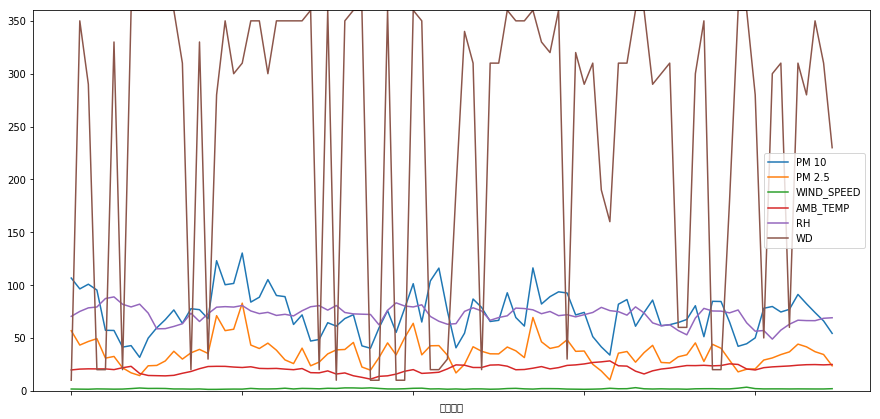

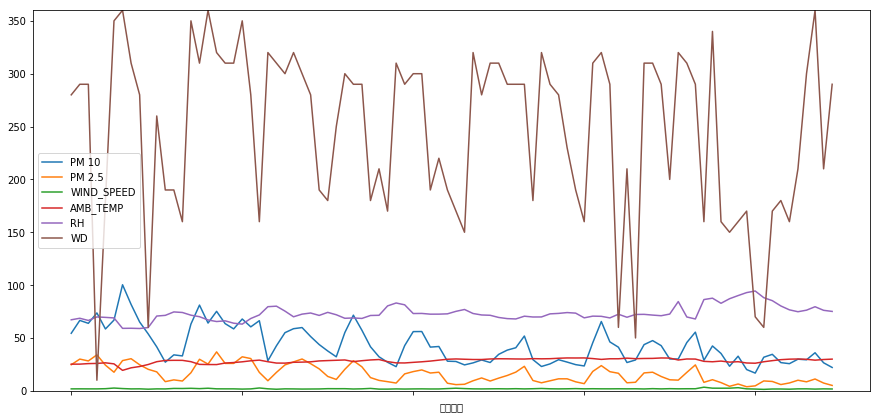

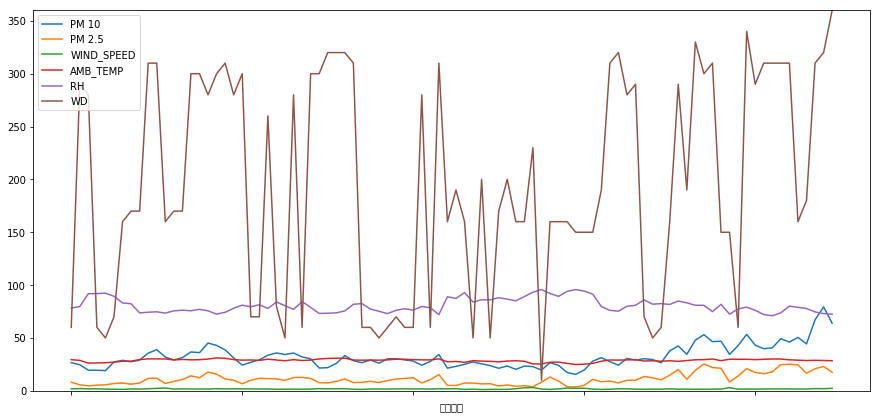

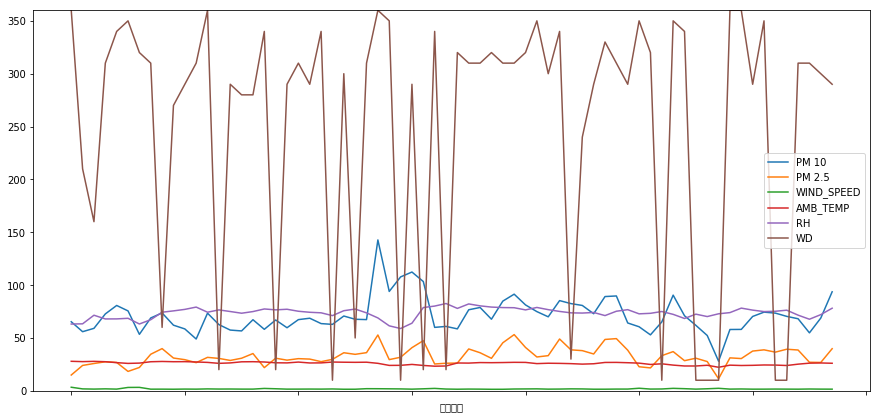

In [35]:
for i in range(0,338,90):
  DF=DF_Mean[i:i+90]
  fig = DF.plot(figsize=(15,7))
  fig.set_ylim(0,360)

[Back to Contents](#目錄)

## 四項資料:R-Square(自變數對應變數的影響程度)為最大
## 只有風速跟溫度預測2018年12/7~28的最小平方法為最小
## 如果去除溫度跑出來的回歸:R-Square最小、最小平方法得出的值最大，所以可以知道溫度對PM 2.5有一定程度的影響